In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection
from sklearn import metrics
%matplotlib inline

## Prepare the Data

In [2]:
train_df = pd.read_csv('train.csv') #properties of the material
elements_df = pd.read_csv('unique_m.csv') #formulas and critical temperature

In [3]:
train_df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
X = train_df.drop(columns=['critical_temp'])
y = train_df['critical_temp']

In [5]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state = 4)

In [6]:
#now we normalize the data so its not biased
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Import some models

In [7]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression
models= [LinearRegression, tree.DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor]

In [8]:
for model in models:
    train = model()
    train.fit(X_train,y_train)
    print(f"Accuracy for {train} is: {train.score(X_test,y_test)}")
    print('---------------------')

Accuracy for LinearRegression() is: 0.7293038243931591
---------------------
Accuracy for DecisionTreeRegressor() is: 0.8599412482606016
---------------------
Accuracy for RandomForestRegressor() is: 0.9146432498250228
---------------------
Accuracy for AdaBoostRegressor() is: 0.6929093558351291
---------------------


Now that we've seen that the best model for our regression problem is RandomForestRegressor, lets do some more processing like dimensionality reduction

## Reduce variables
We can search for highly correlated variables and reduce variables. Then we can run the most succesful algorithm to see if it runs faster and or we can get higher accuracy

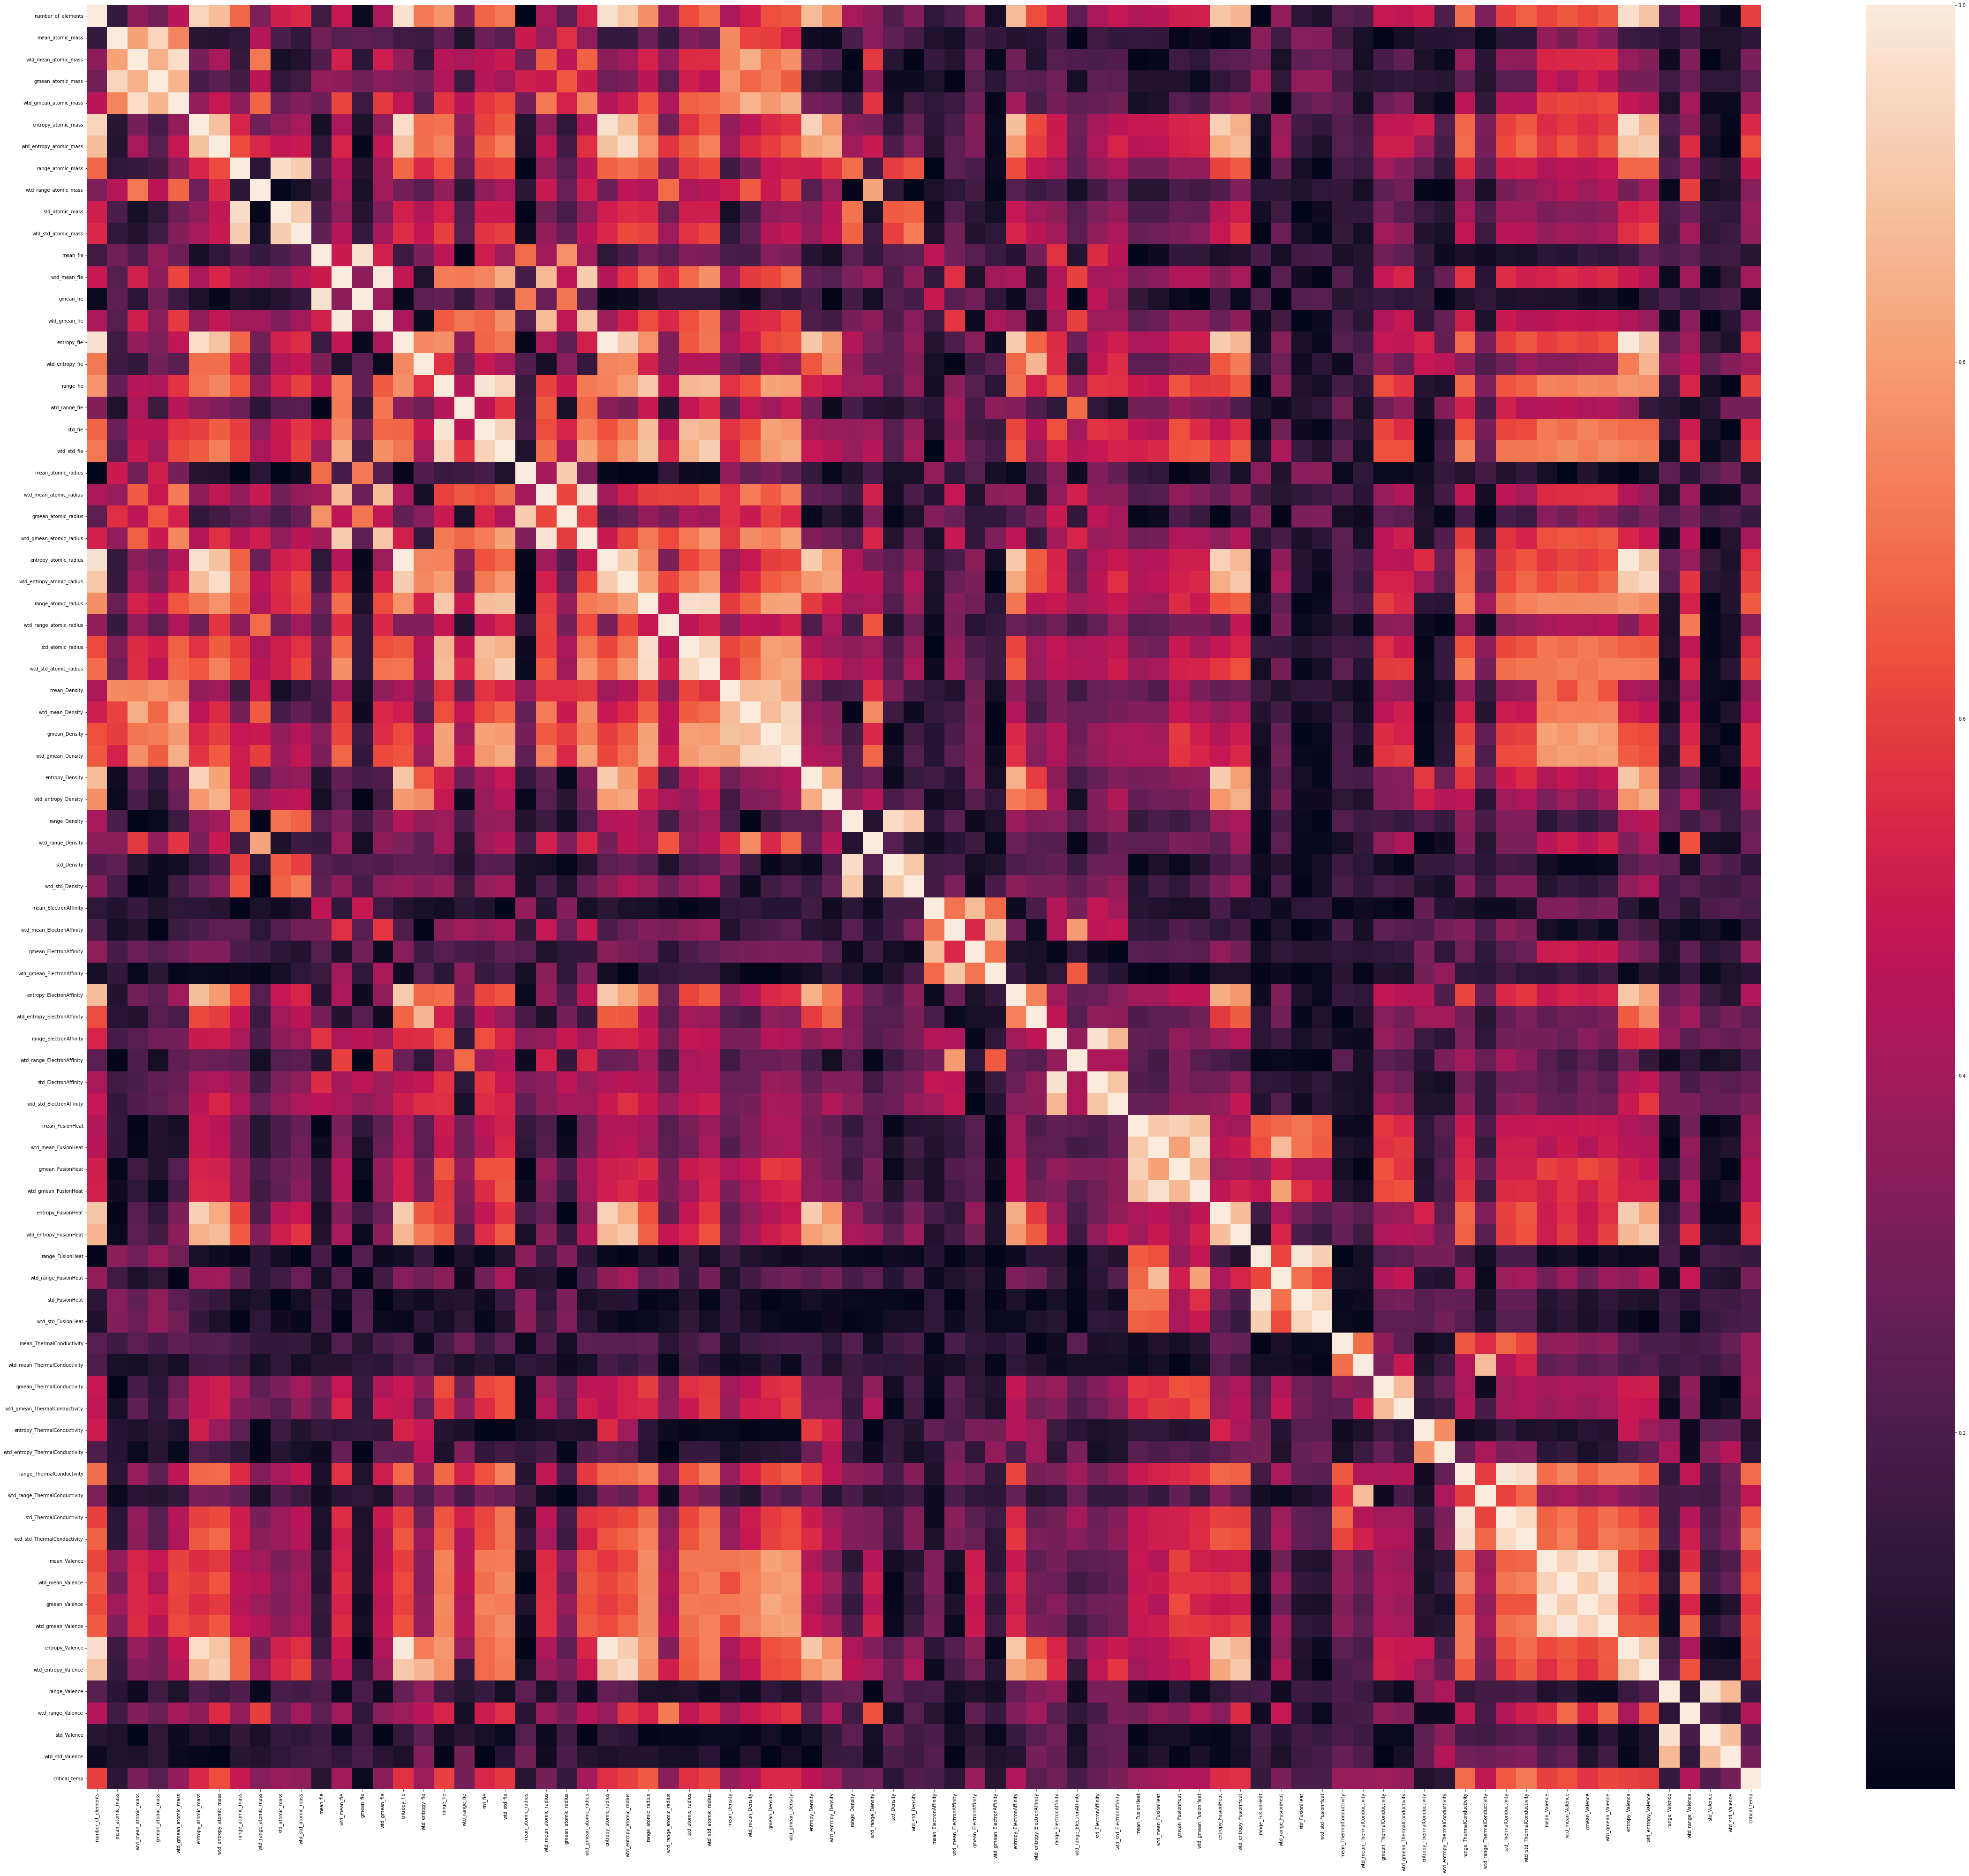

In [30]:
cor_matrix = train_df.corr().abs()
#print(cor_matrix)
fig, ax = plt.subplots(figsize = (80,70))
#sns.set(font_scale=1.5)
sns.heatmap(cor_matrix,ax = ax)
plt.show()

Looking at the supeerior plot we can see how there are highly correlated variables and getting rid of the high correlated variables can lead us to a higher accuracy and faster training

In [31]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

/tmp/ipykernel_4576/1564586771.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [32]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]#IF THE CORRELATION IS HIGHER THAN 0.9 WE CAN DROP THE COLUMNS
#print(); print(to_drop)

In [33]:
train_df_copy = train_df.copy(deep=True)
train_df_copy.drop(columns=to_drop,inplace=True)
train_df_copy.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_entropy_fie,range_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,1.062396,122.90607,31.794921,775.425,1010.268571,0.791488,810.6,...,0.621979,0.308148,0.262848,399.97342,57.127669,2.25,1,1.085714,0.437059,29.0
1,5,92.729214,58.518416,1.057755,122.90607,36.161939,766.440,1010.612857,0.807078,810.6,...,0.619735,0.847404,0.567706,429.97342,51.413383,2.00,2,1.128571,0.468606,26.0
2,4,88.944468,57.885242,0.975980,122.90607,35.741099,775.425,1010.820000,0.773620,810.6,...,0.619095,0.308148,0.250477,399.97342,57.127669,2.25,1,1.114286,0.444697,19.0
3,4,88.944468,57.873967,1.022291,122.90607,33.768010,775.425,1010.544286,0.783207,810.6,...,0.620535,0.308148,0.257045,399.97342,57.127669,2.25,1,1.100000,0.440952,22.0
4,4,88.944468,57.840143,1.129224,122.90607,27.848743,775.425,1009.717143,0.805230,810.6,...,0.624878,0.308148,0.272820,399.97342,57.127669,2.25,1,1.057143,0.428809,23.0


In [34]:
X_clean = train_df_copy.drop(columns=['critical_temp'])
y_clean = train_df_copy['critical_temp']

In [35]:
X_train_clean,X_test_clean,y_train_clean,y_test_clean = model_selection.train_test_split(X_clean,y_clean,test_size=0.2, random_state = 50)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_clean)
X_train_clean = scaler.transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

## Final Test
After cleaning the data we can now test the RandomForestRegressor to see how fast it goes and the accuracy we get

In [37]:
RFR2 =  RandomForestRegressor()
RFR2.fit(X_train_clean,y_train_clean)

RandomForestRegressor()

In [38]:
print(f"Accuracy for RadomForestRegressor with training data is: {RFR2.score(X_train_clean,y_train_clean)}")

Accuracy for RadomForestRegressor with training data is: 0.9776923855208254


In [39]:
print(f"Accuracy for RadomForestRegressor is: {RFR2.score(X_test_clean,y_test_clean)}")

Accuracy for RadomForestRegressor is: 0.922595087653939


In [40]:
compare = pd.DataFrame(data = RFR.predict(X_test_clean),
                       columns = ['Prediction'])
compare['Real Values'] = np.array(y_test_clean)
compare.head()

,Prediction,Real Values
0,4.665700,4.72
1,12.493500,13.00
2,70.835333,73.00
3,21.233000,13.00
4,32.342000,32.00


In [41]:
a = int(input('Which temperature do you want to predict: '))
compare.loc[a]

Which temperature do you want to predict: 


ValueError: invalid literal for int() with base 10: ''

## PCA

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) 
#Get Principal Components
pC = pca.fit_transform(X_clean)
pCdf = pd.DataFrame(data=pC)
pCdf.head()

,0,1,2,3,4,5,6,7,8,9
0,-4070.707788,293.430809,-189.599361,8.682875,461.437364,-107.528581,71.089218,58.110664,-9.021215,-18.965099
1,-3178.854697,1892.196223,-796.412058,-337.974208,816.438027,-12.010177,53.086056,10.778351,14.311215,-5.715878
2,-4023.840070,301.859554,-107.326708,-1.799771,465.971724,-111.275484,72.733579,60.763694,-10.203402,-19.066288
3,-4047.273937,297.645188,-148.463039,3.441599,463.704546,-109.401844,71.911276,59.436707,-9.612589,-19.016197
4,-4117.575466,285.002032,-271.872008,19.165269,456.903186,-103.783056,69.446064,55.460800,-7.836918,-18.863079


In [43]:
X_train_clean,X_test_clean,y_train_clean,y_test_clean = model_selection.train_test_split(X_clean,y_clean,test_size=0.2, random_state = 50)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_clean)
X_train_clean = scaler.transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

In [47]:
RFR3  =  RandomForestRegressor()
RFR3.fit(X_train_clean,y_train_clean)

RandomForestRegressor()

In [48]:
print(f"Accuracy for RadomForestRegressor with training data is: {RFR3.score(X_train_clean,y_train_clean)}")

Accuracy for RadomForestRegressor with training data is: 0.9779745703345433


In [49]:
print(f"Accuracy for RadomForestRegressor is: {RFR3.score(X_test_clean,y_test_clean)}")

Accuracy for RadomForestRegressor is: 0.9219835211659969


In [50]:
compare = pd.DataFrame(data = RFR3.predict(X_test_clean),
                       columns = ['Prediction'])
compare['Real Values'] = np.array(y_test_clean)
compare.head()

,Prediction,Real Values
0,4.614727,4.72
1,12.362850,13.00
2,69.959500,73.00
3,22.857000,13.00
4,32.282875,32.00


In [51]:
a = int(input('Which temperature do you want to predict: '))
compare.loc[a]

Which temperature do you want to predict: 55


Prediction     40.80775
Real Values    46.00000
Name: 55, dtype: float64

## Conclusions:
- The higher accuracy has been acquired with PCA with the filtering of data highly correlated, this is also very useful since we don't have a lot of data and we want to avoid overfitting.